## HW 2 
Emily Yamauchi

### Exercise 3

Function $F$ is defined as :

$$
F(\beta) = \frac{1}{2n}\sum_{i=1}^n(y_i-x_i^\top \beta)^2 + \frac{\lambda}{n}||\beta||_2^2
$$
and the optimal solution as :
$$
F(\beta^*) = \min_{\beta \in \mathbb{R}^d}F(\beta)
$$

1. Assume that $d = 1$ and $n = 1$. The sample size is then of size 1 and boils down to just $(x, y)$. The function $F$ writes simply as

$$
F(\beta) = \frac{1}{2}(y-x\beta)^2 + \lambda\beta^2
$$
    Compute and write down the gradient $\nabla{F}$ of $F$.

Solution:

$$
\begin{align*}
F(\beta) &= \frac{1}{2}(y-x\beta)^2 + \lambda\beta^2 \\
\nabla F(\beta) &= \frac{1}{2}2(y-x\beta)(-x)+2\lambda\beta \\
&= -x(y-x\beta) + 2\lambda\beta \\
\end{align*}
$$

2. Assume now $d > 1$ and $n > 1$. Using the previous result and the linearity of differentiation, compute and write down the gradient $\nabla F(\beta)$ of $F$.

$$
\begin{align*}
F(\beta) &= \frac{1}{2n}\sum_{i=1}^n(y_i-x_i^\top \beta)^2 + \frac{\lambda}{n}||\beta||_2^2 \\
&= \frac{1}{2n}(Y - X^\top \beta)^\top (Y - X^\top \beta)+ \frac{\lambda}{n}\beta^\top \beta \\
&= \frac{1}{2n}\left(Y^\top Y - Y^\top X^\top \beta - \beta^\top X Y + \beta^\top X X^\top \beta\right) + \frac{\lambda}{n}\beta^\top I \beta \\
\nabla F(\beta)&=\frac{1}{2n}[0-XY-XY+(XX^\top + (XX^\top)^\top \beta] + \frac{\lambda}{n}(I+I^\top)\beta \\
&= \frac{1}{2n}[-2XY+2(XX^\top)\beta] + \frac{\lambda}{n}2\beta \\
&= -\frac{1}{n}X(Y-X^\top \beta) + \frac{2}{n}\lambda\beta \\
\end{align*}
$$

Consider the `Penguins` dataset, which you should load and divide into training and test sets using the code below

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
%config IPCompleter.greedy=True

In [2]:
#Load the data
file = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
penguins = pd.read_csv(file, sep=',', header=0)
penguins = penguins.dropna()

In [3]:
#Create our X matrix with the predictors and y vector with the response

X = penguins.drop('body_mass_g', axis=1)
X = pd.get_dummies(X, drop_first=True)
y = penguins['body_mass_g']

In [4]:
#Divide the data into training and test sets. By default, 25% goes into the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Standardize the data. Note that you can convert a dataframe into an array by using `np.array()`

In [5]:
def standardize(data):
    """
    Apply standardization function to input data
    Returns: standardized data in array type
    """
    
    data_s = (data - np.mean(data)) / np.std(data)
    
    return np.array(data_s)

In [6]:
#standardize(X_train)

Xs = standardize(X_train)
ys = standardize(y_train)

In [7]:
print("Xs.shape: ",Xs.shape)
print("Ys.shape: ", ys.shape)

Xs.shape:  (249, 8)
Ys.shape:  (249,)


Write a function *computegrad* that computes and returns $\nabla F(\beta)$ for any $\beta$. Avoid using `for` loops by vectorizing the computation.

In [8]:
def computegrad(beta, X, y, lamb):
    """
    Computes the gradient of the function given the beta, X and y vectors, and lambda
    Returns: gradient of F
    """
    
    n = len(X)
    d1 = (-1/n) * np.dot(X.T, (y - np.dot(X, beta)))
    d2 = (2/n) * lamb * beta
    
    return d1 + d2

Write a function *graddescent* that implements the gradient descent algorithm described in Algorithm 1. The function *graddescent* calls the function *computegrad* as a subroutine. The function takes as input the initial point, the constant step-size value, and the maximum number of iterations. The stopping criterion is the maximum number of iterations.

In [9]:
def graddescent(beta_0, eta, X, y, lamb, iternum):
    """
    Implements the gradient calculations, iterates over specified number at given step size eta
    Returns: array of betas
    """
    
    beta_i = beta_0
    betas = [beta_i]
    for i in range(iternum - 1):
        grad = computegrad(beta_i, X, y, lamb)
        beta_i = beta_i - eta * grad
        betas.append(beta_i)
    
    return np.array(betas)

In [10]:
def obj_function(beta, lamb, X, y):
    
    n = len(X)
    resid_func = sum((y-X.dot(beta))**2)
    lamb_func = np.linalg.norm(beta) ** 2
    
    return 1/(2*n)*resid_func+(lamb/n)*lamb_func

Set the constant step-size $\eta=0.5$ and the maximum number of iterations to 1000. Run *graddescent* on the training set of the `Penguins` dataset for $\lambda=-5.00$. Plot the curve of the objective value $F(\beta_t)$ versus the iteration counter $t$. Again, avoid using for loops when computing the objective values. What do you observe? 

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
eta = 0.5
iternum = 1000
lamb = -5
beta_0 = np.zeros(Xs.shape[1])

betas = graddescent(beta_0, eta, Xs, ys, lamb, iternum)

obj_values = [obj_function(beta, lamb, Xs, ys) for beta in betas]

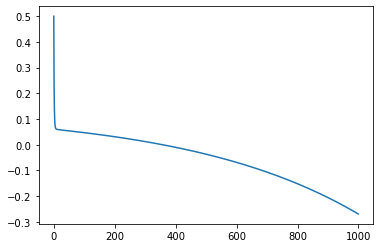

In [13]:
plt.plot(obj_values)

Solution: because the lambda value was negative and the penalized factor was therefore not a penalty, the algorithm does not work as intended, and instead of converging to zero, the value surpassed and fell below 0.

Set the constant step-size $\eta=0.5$ and the maximum number of iterations to 1000. Run *graddescent* on the training set of the `Penguins` dataset for $\lambda=+0.05$. Plot the curve of the objective value $F(\beta_t)$ versus the iteration counter $t$. Again, avoid using for loops when computing the objective values. What do you observe? 

In [14]:
eta = 0.5
iternum = 1000
lamb = 0.05
beta_0 = np.zeros(Xs.shape[1])

betas = graddescent(beta_0, eta, Xs, ys, lamb, iternum)

obj_values = [obj_function(beta, lamb, Xs, ys) for beta in betas]

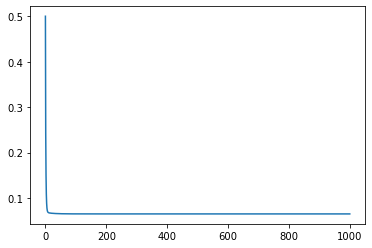

In [15]:
plt.plot(obj_values)

Solution: the algorithm converges to 0 through the iteration as intended.

Denote $\beta_T$ as the final iterate of your gradient descent alorithm. Compare $\beta_T$ to the $\beta^*$ found by *sklearn.linear_model.Ridge*. Compare the objective value for $\beta_T$ to the one for $\beta^*$. What do you observe?

In [16]:
from sklearn.linear_model import Ridge

In [17]:
beta_t = betas[999]

In [18]:
beta_ridge = Ridge(alpha = lamb).fit(Xs,ys).coef_

In [19]:
beta_t

array([ 0.10612898,  0.1071633 ,  0.27768522, -0.12516612,  0.58926332,
       -0.00060885, -0.03824052,  0.27130432])

In [20]:
beta_ridge

array([ 1.05726103e-01,  1.07975282e-01,  2.77200565e-01, -1.24846034e-01,
        5.91031737e-01, -3.16965703e-04, -3.80511179e-02,  2.71328189e-01])

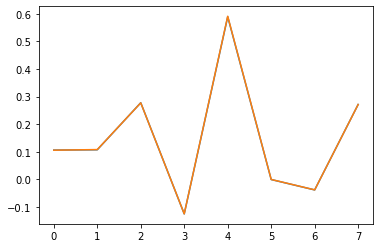

In [21]:
plt.plot(beta_t)
plt.plot(beta_ridge)

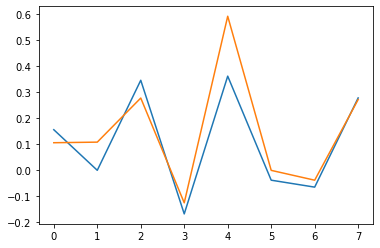

In [22]:
plt.plot(betas[20])
plt.plot(beta_ridge)

The first plot (final beta vs sklearn ridge model) shows that while the coefficients are not equal, they are very close (though the plot choice is not appropriate). An arbitrarily chosen iteration at 20 shows the convergence still in progress.

Run your gradient algorithm for many values of $\eta$ on a logarithmic scale. Find the final iterate, across all runs for all the values of $\eta$, that achieves the smallest value of the objective. Compare $\beta_T$ to the $\beta^*$ found by *sklearn.linear_model.Ridge*. Compare the objective value for $\beta_T$ to the $\beta^*$. What conclusion do you draw?

In [23]:
etas = np.logspace(-4, 1)

In [24]:
def get_min_obj(beta_0, etas, Xs, ys, lamb, iternum):

    beta_min = np.zeros(Xs.shape[1])
    obj_min = obj_function(beta_min, lamb, Xs, ys)
    min_eta = -1
    
    for i in range(len(etas)):
        betas = graddescent(beta_0, etas[i], Xs, ys, lamb, iternum)
        obj_values = [obj_function(beta, lamb, Xs, ys) for beta in betas]
        if min(obj_values) < obj_min:
            obj_min = min(obj_values)
            beta_min = betas[obj_values.index(min(obj_values))]
            min_eta = i
    
    return min_eta, obj_min, beta_min

In [25]:
min_iter = get_min_obj(beta_0, etas, Xs, ys, lamb, iternum)
beta_t_2 = min_iter[2]

/home/eyamauchi/miniconda3/envs/DATA558/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/home/eyamauchi/miniconda3/envs/DATA558/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


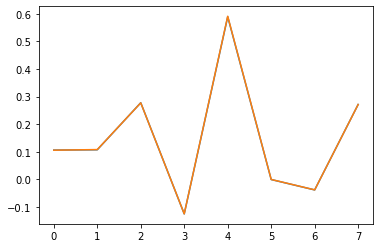

In [26]:
plt.plot(beta_t_2)
plt.plot(beta_ridge)

In [27]:
beta_t_2

array([ 0.10612899,  0.1071633 ,  0.27768523, -0.12516612,  0.5892633 ,
       -0.00060885, -0.03824052,  0.27130432])

In [28]:
beta_ridge

array([ 1.05726103e-01,  1.07975282e-01,  2.77200565e-01, -1.24846034e-01,
        5.91031737e-01, -3.16965703e-04, -3.80511179e-02,  2.71328189e-01])

In [29]:
obj_function(beta_t_2, lamb, Xs, ys)

0.06517434418885117

In [30]:
obj_function(beta_ridge, lamb, Xs, ys)

0.06517443607041079

The two methods result in very close outputs

Change the stopping criterion from being a maximum number of iterations to an $\epsilon$-stationarity condition $||\nabla F(\beta)||\leq \epsilon$. Redo the last three questions now with this stopping criterion with $\epsilon=0.005$. Report your observations.

In [31]:
def graddescent_stop(beta_0, eta, X, y, lamb, stop):
    """
    Implements the gradient calculations, iterates over specified number at given step size eta
    Iterates until reaching stopping criterion
    Returns: array of betas
    """
    
    beta_i = beta_0
    betas = [beta_i]
    grad = computegrad(beta_i, X, y, lamb)
    
    while np.linalg.norm(grad) > stop:
        beta_i = beta_i - eta * grad
        grad = computegrad(beta_i, X, y, lamb)
        betas.append(beta_i)
    
    return np.array(betas)

In [32]:
eta = 0.5
stop = 0.005
lamb = 0.05
beta_0 = np.zeros(Xs.shape[1])

betas_stop = graddescent_stop(beta_0, eta, Xs, ys, lamb, stop)

obj_values_stop = [obj_function(beta, lamb, Xs, ys) for beta in betas]

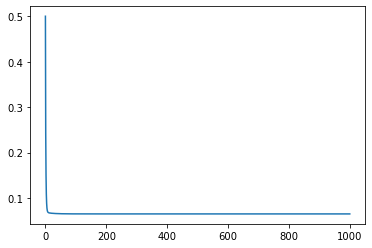

In [33]:
plt.plot(obj_values_stop)

In [34]:
betas_stop[-1]

array([ 0.13176938,  0.06202545,  0.31383182, -0.1504637 ,  0.48397455,
       -0.01244517, -0.04817534,  0.26991908])

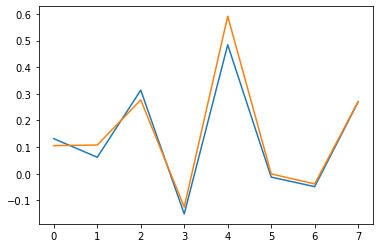

In [35]:
plt.plot(betas_stop[-1])
plt.plot(beta_ridge)

In [36]:
def get_min_obj_stop(beta_0, etas, Xs, ys, lamb, stop):

    beta_min = np.zeros(Xs.shape[1])
    obj_min = obj_function(beta_min, lamb, Xs, ys)
    min_eta = -1
    
    for i in range(len(etas)):
        betas = graddescent_stop(beta_0, etas[i], Xs, ys, lamb, stop)
        obj_values = [obj_function(beta, lamb, Xs, ys) for beta in betas]
        if min(obj_values) < obj_min:
            obj_min = min(obj_values)
            beta_min = betas[obj_values.index(min(obj_values))]
            min_eta = i
    
    return min_eta, obj_min, beta_min

In [37]:
min_iter_stop = get_min_obj_stop(beta_0, etas, Xs, ys, lamb, stop)

/home/eyamauchi/miniconda3/envs/DATA558/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/home/eyamauchi/miniconda3/envs/DATA558/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


In [38]:
min_iter_stop

(35,
 0.06548752882506174,
 array([ 0.13186686,  0.06176926,  0.31399991, -0.15055045,  0.48345024,
        -0.01252457, -0.04823183,  0.26993965]))

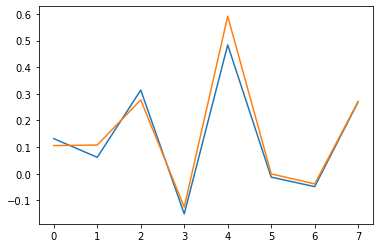

In [39]:
plt.plot(min_iter_stop[2])
plt.plot(beta_ridge)

In [40]:
obj_function(min_iter_stop[2], lamb, Xs, ys)

0.06548752882506174

In [41]:
obj_function(beta_ridge, lamb, Xs, ys)

0.06517443607041079

The stopping criterion added model did not converge to the sklearn Ridge model as the iterative model had done.

### Exercise 4

Exercise 3.8 in Chapter 3 of *An Introduction to Statistical Learning* (in Python): 
This question involves the use of simple linear regression on the `Auto` data set.

1. Read in the dataset. The data can be downloaded from this [url](https://www.statlearning.com/s/Auto.csv). When reading in the data use the option `na_values= '?'`. Then drop all NaN values using `dropna()`.

In [42]:
autos = pd.read_csv('data/Auto.csv', na_values = '?').dropna()

In [43]:
autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


2. Using the OLS function from the `statsmodels` package to perform a simple linear regression with `mpg` as the response and `weight` as the predictor. Be sure to include an intercept. Use the `summary()` attribute to print the results. Comment on the output. For example:

- Is there a relationship between the predictor and the response?
- How strong is the relationship between the predictor and the response?
- Is the relationship between the predictor and the response positive or negative?

Hint: See this [URL](http://www.statsmodels.org/dev/regression.html#examples) for help with the statsmodels functions.

In [44]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [45]:
lm = smf.ols(formula = 'mpg ~ weight', data = autos)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Fri, 16 Apr 2021   Prob (F-statistic):          6.02e-102
Time:                        11:18:01   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

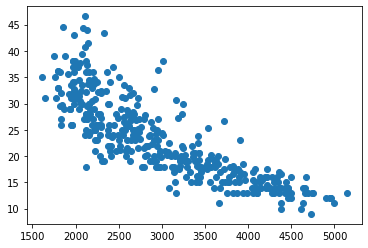

In [46]:
plt.scatter('weight', 'mpg', data = autos)

In [47]:
results.pvalues[1]

6.01529605143624e-102

- Is there a relationship between the predictor and the response?  

- How strong is the relationship between the predictor and the response?  

- Is the relationship between the predictor and the response positive or negative?

<font color = 'green'>Yes, there is a strong (negative) relationship between the variable weight and the mpg. The regression coefficient is -0.0076, and $p-$value is close to 0. </font>

3. Plot the response and the predictor using the `plot_fit` function [URL](http://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.plot_fit.html)

In [48]:
from statsmodels.graphics.regressionplots import plot_fit

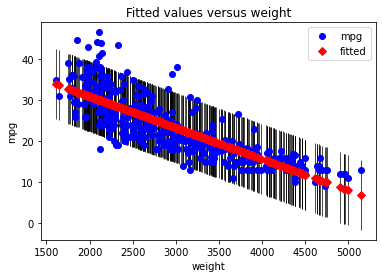

In [49]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results, "weight", ax = ax)

4. Plot the residuals vs. fitted values. Comment on any problems you see with the fit.

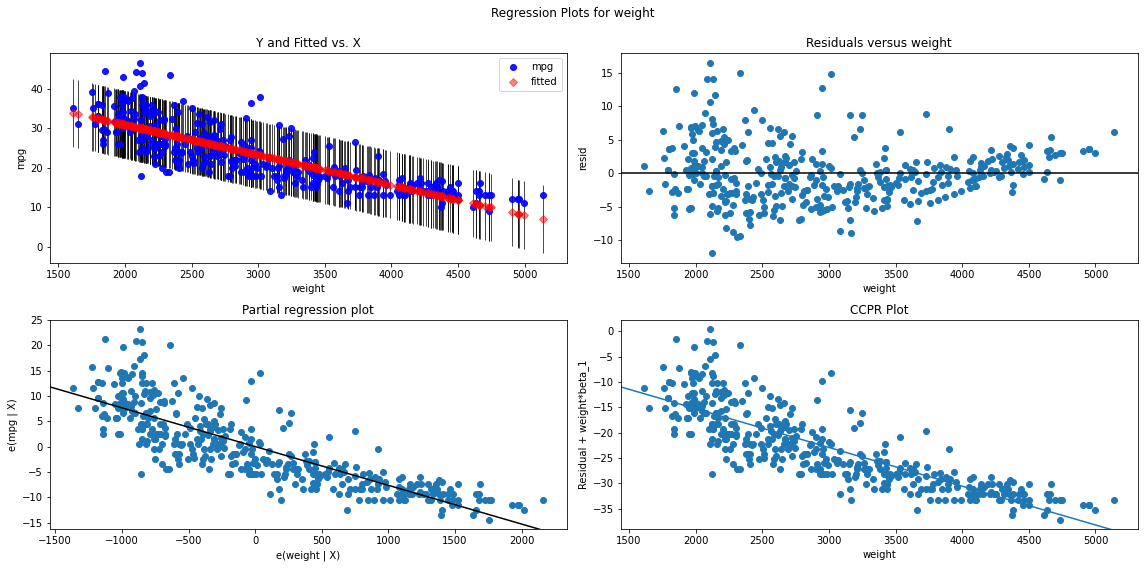

In [50]:
plt.rc("figure", figsize = (16,8))
fig2 = sm.graphics.plot_regress_exog(results, 1)
fig.tight_layout(pad = 1.0)

The residuals seems to follow a nonlinear pattern where it initially decreases as weight increases, but increases as weight increases at around 3000-3500.